In [505]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Get the SPY data from yahoo finance:

In [506]:
start_date = "2003-06-01"
end_date = "2013-05-31"

data = yf.download("SPY", start=start_date, end=end_date)
data.reset_index(inplace=True)

# SPY volume
data.drop(columns={'Open', 'High', 'Low', 'Adj Close'}, inplace=True)

# SPY returns of current and past days
data['SPYt'] = data['Close'].pct_change()
data['SPYt1'] = data['SPYt'].shift(1)
data['SPYt2'] = data['SPYt'].shift(2)
data['SPYt3'] = data['SPYt'].shift(3)

# Calculate relative differences in percentage
data['RDP5'] = ((data['Close'] - data['Close'].shift(5)) / data['Close'].shift(5)) * 100
data['RDP10'] = ((data['Close'] - data['Close'].shift(10)) / data['Close'].shift(10)) * 100
data['RDP15'] = ((data['Close'] - data['Close'].shift(15)) / data['Close'].shift(15)) * 100
data['RDP20'] = ((data['Close'] - data['Close'].shift(20)) / data['Close'].shift(20)) * 100

# Calculate exponential moving averages
data['EMA10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['EMA20'] = data['Close'].ewm(span=20, adjust=False).mean()
data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA200'] = data['Close'].ewm(span=200, adjust=False).mean()

[*********************100%%**********************]  1 of 1 completed


### Get the T-bill rates from downloaded public datasets:

In [507]:
# T-bill rates
tbill_T1 = pd.read_csv('DGS1MO.csv')
tbill_T3 = pd.read_csv('DGS3MO.csv')
tbill_T6 = pd.read_csv('DGS6MO.csv')
tbill_T60 = pd.read_csv('DGS5.csv')
tbill_T120 = pd.read_csv('DGS10.csv')

tbill_T1.rename(columns={'DGS1MO' : 'T1'}, inplace=True)
tbill_T1['DATE'] = pd.to_datetime(tbill_T1['DATE'])
data = pd.merge(data, tbill_T1, left_on='Date', right_on='DATE', how='left', suffixes=('', '_T1'))
data.drop(columns={'DATE'}, inplace=True)

tbill_T3.rename(columns={'DGS3MO' : 'T3'}, inplace=True)
tbill_T3['DATE'] = pd.to_datetime(tbill_T3['DATE'])
data = pd.merge(data, tbill_T3, left_on='Date', right_on='DATE', how='left', suffixes=('', '_T2'))
data.drop(columns={'DATE'}, inplace=True)

tbill_T6.rename(columns={'DGS6MO' : 'T6'}, inplace=True)
tbill_T6['DATE'] = pd.to_datetime(tbill_T6['DATE'])
data = pd.merge(data, tbill_T6, left_on='Date', right_on='DATE', how='left', suffixes=('', '_T3'))
data.drop(columns={'DATE'}, inplace=True)

tbill_T60.rename(columns={'DGS5' : 'T60'}, inplace=True)
tbill_T60['DATE'] = pd.to_datetime(tbill_T60['DATE'])
data = pd.merge(data, tbill_T60, left_on='Date', right_on='DATE', how='left', suffixes=('', '_T4'))
data.drop(columns={'DATE'}, inplace=True)

tbill_T120.rename(columns={'DGS10' : 'T120'}, inplace=True)
tbill_T120['DATE'] = pd.to_datetime(tbill_T120['DATE'])
data = pd.merge(data, tbill_T120, left_on='Date', right_on='DATE', how='left', suffixes=('', '_T5'))
data.drop(columns={'DATE'}, inplace=True)

### Get the certificate of deposit rates from downloaded public datasets:

In [508]:
# Certificate of deposit rates
cd1m = pd.read_csv('CD1M.csv')
cd3m = pd.read_csv('CD3M.csv')
cd6m = pd.read_csv('CD6M.csv')

new_row = pd.DataFrame({'DATE':['2013-06-01'], 'CD1M' :[0]})
cd1m = pd.concat([cd1m, new_row], ignore_index=True)
cd1m['DATE'] = pd.to_datetime(cd1m['DATE'])
cd1m.set_index('DATE', inplace=True)
cd1m = cd1m.resample('D').ffill()
cd1m.reset_index(inplace=True)
data = pd.merge(data, cd1m, left_on='Date', right_on='DATE', how='left')
data.drop(columns={'DATE'}, inplace=True)

new_row = pd.DataFrame({'DATE':['2013-06-01'], 'CD3M' :[0]})
cd3m = pd.concat([cd3m, new_row], ignore_index=True)
cd3m['DATE'] = pd.to_datetime(cd3m['DATE'])
cd3m.set_index('DATE', inplace=True)
cd3m = cd3m.resample('D').ffill()
cd3m.reset_index(inplace=True)
data = pd.merge(data, cd3m, left_on='Date', right_on='DATE', how='left')
data.drop(columns={'DATE'}, inplace=True)

new_row = pd.DataFrame({'DATE':['2013-06-01'], 'CD6M' :[0]})
cd6m = pd.concat([cd6m, new_row], ignore_index=True)
cd6m['DATE'] = pd.to_datetime(cd6m['DATE'])
cd6m.set_index('DATE', inplace=True)
cd6m = cd6m.resample('D').ffill()
cd6m.reset_index(inplace=True)
data = pd.merge(data, cd6m, left_on='Date', right_on='DATE', how='left')
data.drop(columns={'DATE'}, inplace=True)

### Get the close prices for oil and gold from downloaded public datasets:

In [509]:
# Commodities
oil = pd.read_csv('D_CL.csv')
oil.rename(columns={'Date' : 'DATE', 'Close': 'Oil'}, inplace=True)

gold = pd.read_csv('gold.csv')
gold.rename(columns={'Date' : 'DATE', 'Close': 'Gold'}, inplace=True)

oil['DATE'] = pd.to_datetime(oil['DATE'])
data = pd.merge(data, oil[['DATE', 'Oil']], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T5'))
data.drop(columns={'DATE'}, inplace=True)

gold['DATE'] = pd.to_datetime(gold['DATE'])
data = pd.merge(data, gold[['DATE', 'Gold']], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T5'))
data.drop(columns={'DATE'}, inplace=True)

### Get Market yield from downloaded public datasets:

In [510]:
# Market yield
y = pd.read_csv("FRB_H15.csv", skiprows=5)
y['Time Period'] = pd.to_datetime(y['Time Period'])
y.rename(columns={'RIFLGFCM03_N.B': 'CTB3M', 'RIFLGFCM06_N.B': 'CTB6M', 'RIFLGFCY01_N.B': 'CTB1Y', 'RIFLGFCY05_N.B': 'CTB5Y', 'RIFLGFCY10_N.B': 'CTB10Y'}, inplace=True)


data = pd.merge(data, y[['Time Period', 'CTB3M', 'CTB6M', 'CTB1Y', 'CTB5Y', 'CTB10Y']], left_on='Date', right_on='Time Period', how='left', suffixes=('', '_T5'))
data.drop(columns={'Time Period'}, inplace=True)

### Get Moody's yield from public datasets:

In [511]:
# Moody's Yield
aaa = pd.read_csv('RIMLPAAARNM.csv')    # AAA
baa = pd.read_csv('RIMLPBAARNA.csv')    # BAA

aaa.rename(columns={'RIMLPAAARNM': 'AAA'}, inplace=True)
aaa['DATE'] = pd.to_datetime(aaa['DATE'])
aaa.set_index('DATE', inplace=True)
aaa = aaa.resample('D').ffill()
aaa.reset_index(inplace=True)
data = pd.merge(data, aaa, left_on='Date', right_on='DATE', how='left')
data.drop(columns={'DATE'}, inplace=True)

baa.rename(columns={'RIMLPBAARNA': 'BAA'}, inplace=True)
baa['DATE'] = pd.to_datetime(baa['DATE'])
baa.set_index('DATE', inplace=True)
baa = baa.resample('M').ffill()
baa = baa.resample('D').ffill()
baa.reset_index(inplace=True)
data = pd.merge(data, baa, left_on='Date', right_on='DATE', how='left')
data.drop(columns={'DATE'}, inplace=True)

In [512]:
# Convert all data to numerical values for next steps
for column in data.columns:
    if column != 'Date':
        data[column] = pd.to_numeric(data[column], errors='coerce')

### Get the term and default spreads:

In [513]:
# Term and default spreads
data['TE1'] = data['T120'] - data['T1']
data['TE2'] = data['T120'] - data['T3']
data['TE3'] = data['T120'] - data['T6']

data['TE5'] = data['T3'] - data['T1']
data['TE6'] = data['T6'] - data['T1']

data['DE1'] = data['BAA'] - data['AAA']
data['DE2'] = data['BAA'] - data['T120']

data['DE4'] = data['BAA'] - data['T6']
data['DE5'] = data['BAA'] - data['T3']
data['DE6'] = data['BAA'] - data['T1']

data['DE7'] = data['CD6M'] - data['T6']

### Get currencies from public datasets:

In [514]:
# Currencies
jpy = pd.read_csv('USD_JPY Historical Data.csv')
gbp = pd.read_csv('USD_GBP Historical Data.csv')
cad = pd.read_csv('USD_CAD Historical Data.csv')
cny = pd.read_csv('USD_CNY Historical Data.csv')

jpy.reset_index(inplace=True)
jpy.rename(columns={'Date' : 'DATE', 'Price': 'JPY'}, inplace=True)
jpy['DATE'] = pd.to_datetime(jpy['DATE'])
data = pd.merge(data, jpy[['DATE', 'JPY']], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T1'))
data.drop(columns={'DATE'}, inplace=True)

gbp.reset_index(inplace=True)
gbp.rename(columns={'Date' : 'DATE', 'Price': 'GBP'}, inplace=True)
gbp['DATE'] = pd.to_datetime(gbp['DATE'])
data = pd.merge(data, gbp[['DATE', 'GBP']], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T1'))
data.drop(columns={'DATE'}, inplace=True)

cad.reset_index(inplace=True)
cad.rename(columns={'Date' : 'DATE', 'Price': 'CAD'}, inplace=True)
cad['DATE'] = pd.to_datetime(cad['DATE'])
data = pd.merge(data, cad[['DATE', 'CAD']], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T1'))
data.drop(columns={'DATE'}, inplace=True)

cny.reset_index(inplace=True)
cny.rename(columns={'Date' : 'DATE', 'Price': 'CNY'}, inplace=True)
cny['DATE'] = pd.to_datetime(cny['DATE'])
data = pd.merge(data, cny[['DATE', 'CNY']], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T1'))
data.drop(columns={'DATE'}, inplace=True)

### Get different indexes and stocks from yahoo finance:

In [515]:
# Indexes
hsi = yf.download("HSI", start=start_date, end=end_date)
sse = yf.download("000001.SS", start=start_date, end=end_date)
fchi = yf.download("^FCHI", start=start_date, end=end_date)
ftse = yf.download("^FTSE", start=start_date, end=end_date)
gdaxi = yf.download("^GDAXI", start=start_date, end=end_date)
dji = yf.download("^DJI", start=start_date, end=end_date)
ixic = yf.download("^IXIC", start=start_date, end=end_date)


hsi.reset_index(inplace=True)
hsi.rename(columns={'Date' : 'DATE', 'Close': 'HSI'}, inplace=True)
hsi['DATE'] = pd.to_datetime(hsi['DATE'])
data = pd.merge(data, hsi[['DATE', 'HSI']], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T1'))
data.drop(columns={'DATE'}, inplace=True)

sse.reset_index(inplace=True)
sse.rename(columns={'Date' : 'DATE', 'Close': 'SSE'}, inplace=True)
sse['DATE'] = pd.to_datetime(sse['DATE'])
data = pd.merge(data, sse[['DATE', 'SSE']], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T1'))
data.drop(columns={'DATE'}, inplace=True)

fchi.reset_index(inplace=True)
fchi.rename(columns={'Date' : 'DATE', 'Close': 'FCHI'}, inplace=True)
fchi['DATE'] = pd.to_datetime(fchi['DATE'])
data = pd.merge(data, fchi[['DATE', 'FCHI']], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T1'))
data.drop(columns={'DATE'}, inplace=True)

ftse.reset_index(inplace=True)
ftse.rename(columns={'Date' : 'DATE', 'Close': 'FTSE'}, inplace=True)
ftse['DATE'] = pd.to_datetime(ftse['DATE'])
data = pd.merge(data, ftse[['DATE', 'FTSE']], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T1'))
data.drop(columns={'DATE'}, inplace=True)

gdaxi.reset_index(inplace=True)
gdaxi.rename(columns={'Date' : 'DATE', 'Close': 'GDAXI'}, inplace=True)
gdaxi['DATE'] = pd.to_datetime(gdaxi['DATE'])
data = pd.merge(data, gdaxi[['DATE', 'GDAXI']], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T1'))
data.drop(columns={'DATE'}, inplace=True)

dji.reset_index(inplace=True)
dji.rename(columns={'Date' : 'DATE', 'Close': 'DJI'}, inplace=True)
dji['DATE'] = pd.to_datetime(dji['DATE'])
data = pd.merge(data, dji[['DATE', 'DJI']], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T1'))
data.drop(columns={'DATE'}, inplace=True)

ixic.reset_index(inplace=True)
ixic.rename(columns={'Date' : 'DATE', 'Close': 'IXIC'}, inplace=True)
ixic['DATE'] = pd.to_datetime(ixic['DATE'])
data = pd.merge(data, ixic[['DATE', 'IXIC']], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T1'))
data.drop(columns={'DATE'}, inplace=True)

# Stocks
aapl = yf.download("AAPL", start=start_date, end=end_date)
msft = yf.download("MSFT", start=start_date, end=end_date)
xom = yf.download("XOM", start=start_date, end=end_date)
ge = yf.download("GE", start=start_date, end=end_date)
jnj = yf.download("JNJ", start=start_date, end=end_date)
wfc = yf.download("WFC", start=start_date, end=end_date)
amzn = yf.download("AMZN", start=start_date, end=end_date)
jpm = yf.download("JPM", start=start_date, end=end_date)

names = ['AAPL', 'MSFT', 'XOM', 'GE', 'JNJ', 'WFC', 'AMZN', 'JPM']
stocks = []

for name in names:
    stocks.append(yf.download(name, start=start_date, end=end_date))

for i in range(len(stocks)):
    stocks[i].reset_index(inplace=True)
    stocks[i].rename(columns={'Date' : 'DATE', 'Close': names[i]}, inplace=True)
    stocks[i]['DATE'] = pd.to_datetime(stocks[i]['DATE'])
    data = pd.merge(data, stocks[i][['DATE', names[i]]], left_on='Date', right_on='DATE', how='left', suffixes=('', '_T1'))
    data.drop(columns={'DATE'}, inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [516]:
data.head()

,Date,Close,Volume,SPYt,SPYt1,SPYt2,SPYt3,RDP5,RDP10,RDP15,...,DJI,IXIC,AAPL,MSFT,XOM,GE,JNJ,WFC,AMZN,JPM
0,2003-06-02,97.349998,50305500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8897.809570,1590.750000,0.311607,24.639999,36.580002,138.980682,53.220001,24.450001,1.7700,33.919998
1,2003-06-03,97.750000,38254500,0.004109,NaN,NaN,NaN,NaN,NaN,NaN,...,8922.950195,1603.560059,0.309107,24.879999,36.980000,139.220306,53.849998,24.635000,1.7615,33.820000
2,2003-06-04,99.160004,49360700,0.014425,0.004109,NaN,NaN,NaN,NaN,NaN,...,9038.980469,1634.650024,0.314286,24.870001,37.400002,140.705963,54.060001,25.120001,1.7695,34.689999
3,2003-06-05,99.650002,46262400,0.004941,0.014425,0.004109,NaN,NaN,NaN,NaN,...,9041.299805,1646.010010,0.315000,24.090000,37.160000,142.718781,52.020000,25.299999,1.7760,35.099998
4,2003-06-06,99.260002,60356800,-0.003914,0.004941,0.014425,0.004109,NaN,NaN,NaN,...,9062.790039,1627.420044,0.306250,23.670000,37.340000,145.210846,52.750000,25.150000,1.6675,35.130001


In [517]:
print('Dataset has dimension : ' + str(len(data.columns)) + 'x' + str(len(data)))

Dataset has dimension : 62x2517


# Data preprocessing:

### Before preprocessing:

In [518]:
original_data = data.copy()

### Dealing with missing values:

In [519]:
numeric_col = data.select_dtypes(include=[np.number]).columns


for col in numeric_col:
    
    # Replace the first n nan of each column by the mean of the following n non missing values
    if pd.isna(data[col].iloc[0]):
        # Calculate the length of consecutive NaNs from the start
        length_nan = data[col].isnull().cumsum().iloc[-1]  # This counts all NaNs cumulatively

        # Find the next n non-missing values after the initial NaNs
        non_missing_after_nans = data[col][length_nan:].dropna().head(length_nan)
        if not non_missing_after_nans.empty:

            mean_value = non_missing_after_nans.mean()
            data.loc[data[col].index[:length_nan], col] = mean_value

In [520]:
# Replace the other missing values of each column by the value before

for col in numeric_col: 
    
    val = data[col][0]
    
    for i in range(len(data[col])):
        
        if np.isnan(data[col][i]):
            data.loc[i, col] = val
            
        else:
            
            val = data[col][i]

### Dealing with outliers:

In [521]:
numeric_col = data.select_dtypes(include=[np.number]).columns

# Getting rid of missing values by filling them with the average of 3 closest values
for column in numeric_col:

    data[column] = data[column].fillna(data[column].rolling(window=3, min_periods=1, center=True).mean())

# Changing outliers to the closest IQR boundary
for column in numeric_col:
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

### Comparaison with data after preprocessing:

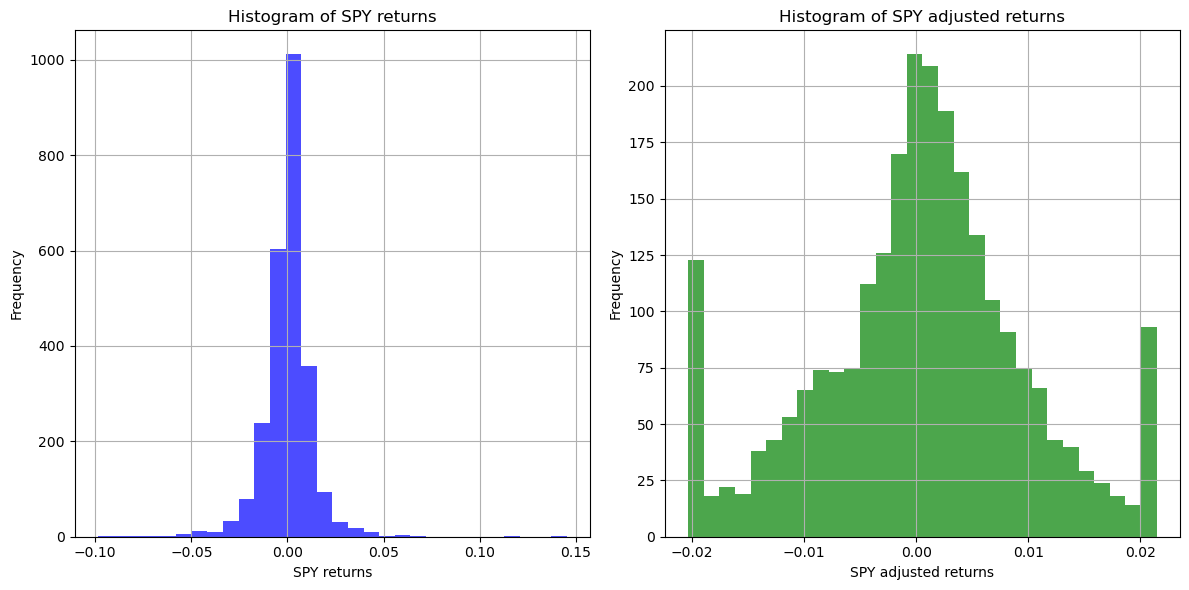

In [522]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # nrows=1, ncols=2 for two plots on the same row

# Plotting histogram for the 'close' column on the first subplot
axes[0].hist(original_data['SPYt'], bins=30, alpha=0.7, color='blue')
axes[0].set_title('Histogram of SPY returns')
axes[0].set_xlabel('SPY returns')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Plotting histogram for the 'open' column on the second subplot
axes[1].hist(data['SPYt'], bins=30, alpha=0.7, color='green')
axes[1].set_title('Histogram of SPY adjusted returns')
axes[1].set_xlabel('SPY adjusted returns')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Display the figure with histograms
plt.tight_layout()  # Adjust the layout to make sure there's no overlap
plt.show()

In [523]:
# Create the final full dataset
data.to_csv('raw_dataset.csv')